In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Get the data from the file `backprop.csv`
df = pd.read_csv('backprop.csv')

# Assign the predictor and response variables to x and y
x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

In [3]:
# Initialize the weights, but keep the random seed as 310 for reproducible results
np.random.seed(310)

# W is a list that contains both w1 and w2
# W = [w1,w2]
W = [np.random.randn(1, 1), np.random.randn(1, 1)]

## Defining the activation function and the neural network

In [4]:
# Function to compute the activation function
def A(x):
    return np.sin(x)

# Function to compute the derivative of the activation function
def der_A(x):
    return np.cos(x)
    

In [5]:
# Function to define the neural network
def neural_network(W, x):
    # W is a list of the two weights (w1,w2) of your neural network
    # x is the input to the neural network
    w1 = W[0]
    w2 = W[1]
    '''
    Compute h1, h2,a1 and y
    h1 is the dot product of the input and weight
    To compute h2, first use the activation function on h1, then multiply by w2
    Finally, use the activation function on h2 to compute y
    Return all three values which you will use to compute derivatives later
    '''
    h1 = np.dot(x,w1)
    a1 = np.sin(h1)
    h2 = np.dot(a1,w2)
    y = np.sin(h2)
    
    # Remember that we return all affine transformations and the output
    return h1,h2,a1,y
    

## Building the chain-rule components 

### ⏸ Look at the schematic in the instructions. If we consider the first weight, what is $\ \frac{\partial h_1}{\partial w_1}$?

#### A. $x$
#### B. $f(x)$
#### C. $f'(x)$
#### D. $w_1x$

In [6]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'A'


In [7]:
# Function to compute the partial derivate of affine 
# (particular neuron) wrt corresponding weight w

def dhdw(var):
    '''
    The derivative of the affine wrt the preceding weight is just 
    the activation of the previous neuron.
    Note, account for the case where the input layer has no activation 
    layers associated with it. i.e return the same value if it is the first weight 
    '''
    # I didn't think of a more general solution, because this function only passes in one value.
    return 'x' if (var == 'w1') else 'a1'

In [8]:
# Function to compute the partial derivate of activation wrt affine
def dadh(h):
    '''
    This is the derivative of the output of the activation function 
    wrt the affine transformation.
    Return the derivative of the affine transformation
    '''
    return der_A(h)

In [9]:
# Function to compute the partial derivate of output wrt activation
def dyda(h=0):
    '''
    This is the function to compute the partial derivative of the output 
    wrt the activation.
    NOTE: It returns a constant (i.e. 1) for our simple neural network
    because y=a2, however it may not be the case in general
    '''
    return 1
    

In [10]:
# Function to compute the partial derivate of affine
# wrt the previous activation
def dhda(w):
    '''
    The derivative of the affine wrt the previous activation is the weight
    '''
    return w
    

In [11]:
# Function to compute the partial derivate of loss with respect to y
def dldy(y_pred,y):
    '''
    Since our loss function is the MSE,
    the partial derivative of L wrt y will be 2*(y_pred - y), 
    for all predictions and response
    '''
    return 2*(y_pred - y)
    

### ⏸ Look at the schematic in the instructions. What is the difference between $h_i$ and $a_i$ for a given layer $i$?

#### A. $h_i$ and $a_i$ are one and the same
#### B. $h_i$ is the affine transformation on inputs from layer $i-1$ and $a_i$ is the activation over $h_i$
#### C. $a_i$ is the affine transformation on inputs from layer $i-1$ and $h_i$ is the activation over $a_i$
#### D. We use $a_i$ in case of linear functions and $h_i$ in case of non-linear functions

In [12]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer2 = 'B'


### Hint for the function definition below: 


$$\frac{\partial L}{\partial w_1}\ =\ \frac{\partial L}{\partial y}\ \frac{\partial y}{\partial a_2}\frac{\partial a_2}{\partial h_2}\ 
\frac{\partial h_2}{\partial a_1}
\frac{\partial a_1}{\partial h_1}\ 
\frac{\partial h_1}{\partial w_1}$$

$$\frac{\partial L}{\partial w_2}\ =\ \frac{\partial L}{\partial y}\ \frac{\partial y}{\partial a_2}\frac{\partial a_2}{\partial h_2}
\frac{\partial h_2}{\partial w_2}$$

In [13]:
# Function to compute the partial derivate of loss with respect to w

def dldw(W,x):
    '''
    Now, combine the functions from above and 
    find the derivative wrt the weights.
    These will be for all the points, hence take a mean of all values 
    for each partial derivative and return as a list of 2 values
    '''
    h1,h2,a1,y_pred = neural_network(W,x)
    w1,w2 = W
    
    # Use eval to convert the variable name to the corresponding value
    # I didn't think of a better way to do it
    # because dhdw() function only passes in single value.

    # Derivative of the loss wrt the second weight
    dldw2 = dldy(y_pred,y)*dyda()*dadh(h2)*eval(dhdw('w2'))
    # Derivative of the loss wrt the first weight
    dldw1 = dldy(y_pred,y)*dyda()*dadh(h2)*dhda(w2)*dadh(h1)*eval(dhdw('w1'))
    
    # return [np.mean(dldw1)]
    return [np.mean(dldw1),np.mean(dldw2)]
    

In [14]:
### edTest(test_gradient) ###

# Compute the gradient of the loss function with respect to the weights using function defined above
# This is dldw() with inputs as 'W' and 'x' as defined above
gradW = dldw(W,x)

# Print the list of your gradients below
print(f'The derivatives of w1 and w2 wrt L are {gradW}')


The derivatives of w1 and w2 wrt L are [-0.0077779005629820975, 0.27880021231495045]


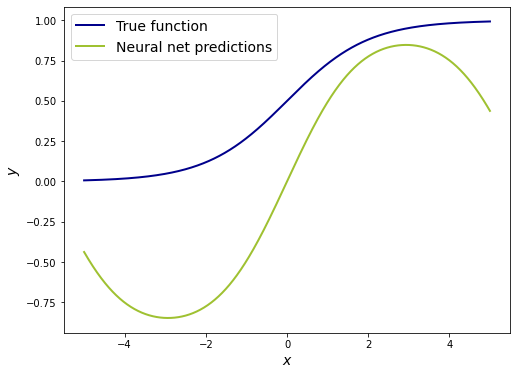

In [16]:
# Visualise the data generated

fig,ax = plt.subplots(1,1,figsize=(8,6))

# Plot the true x and y values
ax.plot(x,y,label = 'True function',color='darkblue',linewidth=2)

# Plot the x values with the network predictions
h1, h2, _, y_pred = neural_network(W,x)
ax.plot(x,y_pred,label = 'Neural net predictions',color='#9FC131FF',linewidth=2)

# Set the x and y labels
ax.set_xlabel('$x$',fontsize=14)
ax.set_ylabel('$y$',fontsize=14)
ax.legend(fontsize=14);